In [5]:
# To Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [33]:
# Importing packages
import tensorflow as tf
import keras
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [7]:
# Loading dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 101)

In [42]:
# Storing all the class names we have in sequence

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

<function matplotlib.pyplot.show(close=None, block=None)>

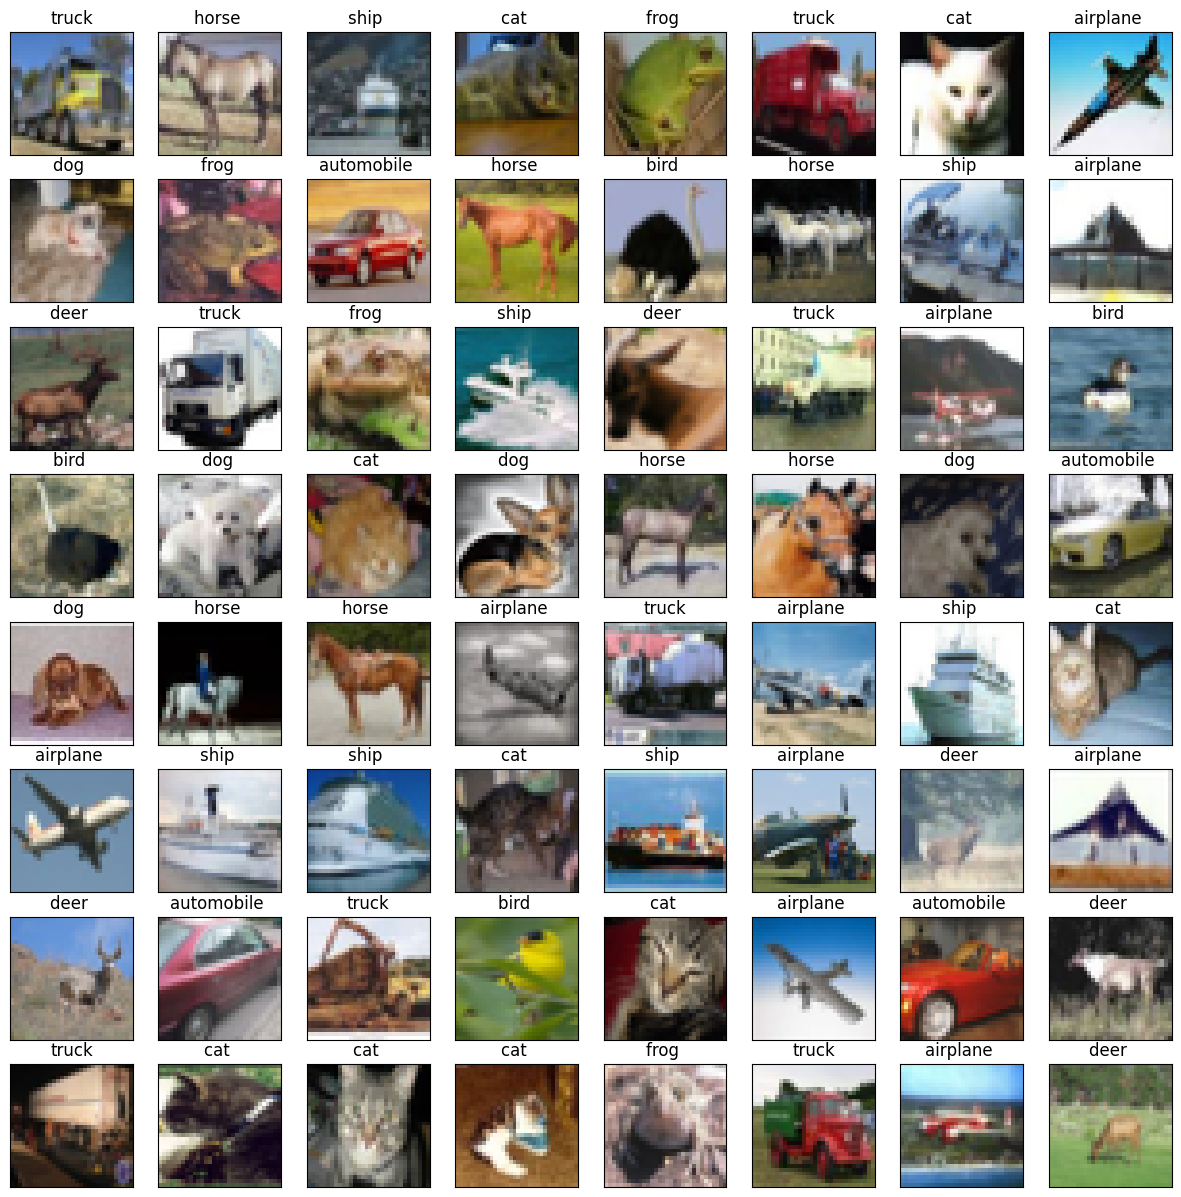

In [10]:
#Plotting few images for reference
plt.figure(figsize=(15, 15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])

plt.show

# Data preprocessing

1. Normalization of images
2. One hot encoding of labels
3. Data Augmentation


### Normalisation

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std = np.std(X_train)
# X_train = X_train / 255
# X_test = X_test / 255
# X_valid = X_valid / 255
X_train = (X_train-mean)/(std+.00000001)
X_test = (X_test-mean)/(std+.00000001)
X_valid = (X_valid-mean)/(std+.00000001)


### One hot encoding

In [13]:
y_train = to_categorical(y_train,10 )
y_test = to_categorical(y_test,10 )
y_valid = to_categorical(y_valid,10 )

### Data Augmentation

In [15]:
data_generator = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.12,
    height_shift_range = 0.12,
    horizontal_flip = True,
    zoom_range = 0.1,
    brightness_range = [0.9, 1.1],
    shear_range = 10,
    channel_shift_range = 0.1

)

### Model

In [16]:
# Making the model architecture

model = Sequential()

weight_decay = 0.0001   # weight decay for l2 regularization

# 1st layer
model.add(Conv2D(filters = 32, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay), input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

# 2nd layer
model.add(Conv2D(filters = 64, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

#

model.add(Conv2D(filters = 128, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.4 ))


model.add(Conv2D(filters = 256, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size =(3,3), padding ='same', activation ='relu', kernel_regularizer = l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.5))

# Flatten the tensor output

model.add(Flatten())

# fully connected layer
model.add(Dense(10, activation = 'softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [18]:
# Actual training parameters
# Initial training being done

batch_size = 64
epoch = 50
optimizer = Adam(learning_rate = 0.0005)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

reduce_lr=ReduceLROnPlateau(monitor ='val_loss', factor = 0.5, patience =10, min_lr = 0.00001)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 40, restore_best_weights = True, verbose=1 )

history = model.fit(data_generator.flow(X_train, y_train, batch_size= batch_size), epochs = epoch, validation_data = (X_valid, y_valid), callbacks = [reduce_lr, early_stopping])

model.save('cifar.keras')

### Visualizing the learning curves

Text(0.5, 1.0, 'Accuracy Evaluation')

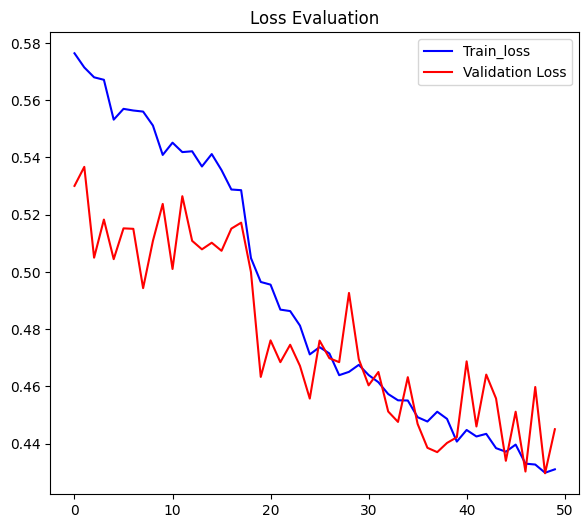

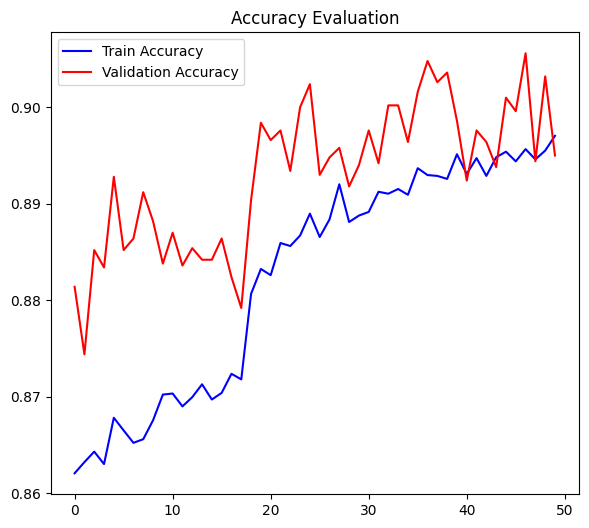

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train_loss', color ='blue')
plt.plot(model.history.history['val_loss'], label = 'Validation Loss', color = 'red')
plt.legend()
plt.title('Loss Evaluation')

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color ='blue')
plt.plot(model.history.history['val_accuracy'], label = 'Validation Accuracy', color = 'red')
plt.legend()
plt.title('Accuracy Evaluation')

## Evaluating the Optimal Model on Test Data

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy : {test_acc} \n TestLoss : {test_loss}")

313/313 [==============================] - 5s 15ms/step - loss: 0.4779 - accuracy: 0.8905
Test accuracy : 0.890500009059906 
 TestLoss : 0.4779457151889801


## Performance on external image

<function matplotlib.pyplot.show(close=None, block=None)>

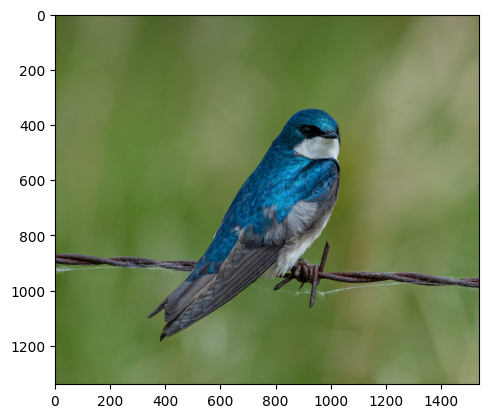

In [36]:
url = 'https://naturealberta.ca/wp-content/uploads/2025/04/6.-Tree-Swallow-NICK-CARTER-1536x1340.jpg'
reps = urllib.request.urlopen(url)
image = np.asarray(bytearray(reps.read()), dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# cv2.cvtColor(image, cv2.cvtColor_BGR2RGB)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show

In [37]:
image.shape

(1340, 1536, 3)

In [38]:
# converting 32 * 32
image = cv2.resize(image, (32, 32))

# normalize the image
image = (image - mean)/(std+.00000001)

# add a dimension
image = image.reshape((1, 32, 32, 3))

In [52]:
# Prediction

predict = model.predict(image)
print(class_names[predict.argmax()])

1/1 [==============================] - 0s 24ms/step
bird


In [54]:
# further training on model

from keras.models import load_model

model = load_model("my_model.keras")  # or "cifar.keras" if you prefer

history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_valid, y_valid),
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/20
704/704 [==============================] - 71s 98ms/step - loss: 0.4271 - accuracy: 0.8963 - val_loss: 0.4456 - val_accuracy: 0.8964 - lr: 1.2500e-04
Epoch 2/20
704/704 [==============================] - 69s 98ms/step - loss: 0.4262 - accuracy: 0.8981 - val_loss: 0.4386 - val_accuracy: 0.9010 - lr: 1.2500e-04
Epoch 3/20
704/704 [==============================] - 69s 98ms/step - loss: 0.4242 - accuracy: 0.8985 - val_loss: 0.4246 - val_accuracy: 0.9036 - lr: 1.2500e-04
Epoch 4/20
704/704 [==============================] - 70s 99ms/step - loss: 0.4306 - accuracy: 0.8956 - val_loss: 0.4187 - val_accuracy: 0.9002 - lr: 1.2500e-04
Epoch 5/20
704/704 [==============================] - 70s 99ms/step - loss: 0.4235 - accuracy: 0.8986 - val_loss: 0.4556 - val_accuracy: 0.8946 - lr: 1.2500e-04
Epoch 6/20
704/704 [==============================] - 69s 99ms/step - loss: 0.4249 - accuracy: 0.8973 - val_loss: 0.4348 - val_accuracy: 0.8990 - lr: 1.2500e-04
Epoch 7/20
704/704 [==============

In [55]:
model.save("my_model.keras")